In [121]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.manifold import TSNE
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import cosine_similarity
from dash import Dash, dcc, html, Input, Output
import plotly.express as px

In [122]:
data = {
    'Class': ['A', 'B', 'C', 'D', 'E', 'F', 'G'],
    'Drink': ['7Up', 'Sprite', 'Pepsi', 'Coke', 'Cappuccino', 'Espresso', 'Latte'],
    'Rank': [7, 6, 5, 4, 3, 2, 1],
    'Amount(N(μ,σ))': ['N(100, 200)', 'N(200, 10)', 'N(200, 10)', 'N(400, 100)', 'N(800, 10)', 'N(800, 10)', 'N(900, 400)'],
    'Quantity': ['Random(500, 1000)', 'Random(500, 1000)', 'Random(500, 1000)', 'Random(500, 1000)', 'Random(1, 500)', 'Random(1, 500)', 'Random(1, 500)'],
    'Count': [100, 200, 100, 400, 400, 200, 100]
}
df = pd.DataFrame(data)

In [123]:
df

,Class,Drink,Rank,"Amount(N(μ,σ))",Quantity,Count
0,A,7Up,7,"N(100, 200)","Random(500, 1000)",100
1,B,Sprite,6,"N(200, 10)","Random(500, 1000)",200
2,C,Pepsi,5,"N(200, 10)","Random(500, 1000)",100
3,D,Coke,4,"N(400, 100)","Random(500, 1000)",400
4,E,Cappuccino,3,"N(800, 10)","Random(1, 500)",400
5,F,Espresso,2,"N(800, 10)","Random(1, 500)",200
6,G,Latte,1,"N(900, 400)","Random(1, 500)",100


In [124]:
# 1. 生成數據集
data = []
for class_label in df['Class'].unique():
    class_data = df[df['Class'] == class_label]
    for _, row in class_data.iterrows():
        drink, rank, count = row['Drink'], row['Rank'], row['Count']
        mu, sigma = map(int, re.findall(r'\d+', row['Amount(N(μ,σ))']))
        min_val, max_val = map(int, re.findall(r'\d+', row['Quantity']))

        amounts = np.random.normal(mu, sigma, count)
        quantities = np.random.uniform(min_val, max_val, count)

        for i in range(count):
            data_point = {
                'Class': class_label,
                'Drink': drink,
                'Rank': rank,
                'Amount': amounts[i],
                'Quantity': quantities[i]
            }
            data.append(data_point)

df = pd.DataFrame(data)
df

,Class,Drink,Rank,Amount,Quantity
0,A,7Up,7,310.325704,506.799858
1,A,7Up,7,131.209126,697.217112
2,A,7Up,7,340.898362,559.023336
3,A,7Up,7,81.146258,764.201417
4,A,7Up,7,415.268146,941.384662
...,...,...,...,...,...
1495,G,Latte,1,399.925669,174.339038
1496,G,Latte,1,1176.831300,362.837012
1497,G,Latte,1,1299.081460,91.578455
1498,G,Latte,1,735.657686,147.937327


c:\Users\UM\anaconda3\envs\bug\Lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

c:\Users\UM\anaconda3\envs\bug\Lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



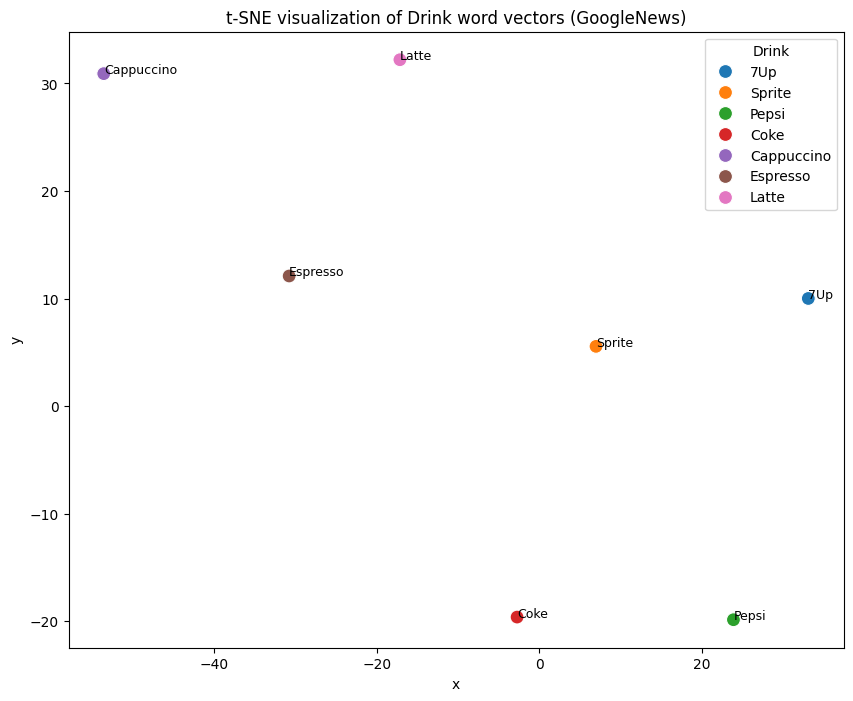

In [125]:

model = api.load("glove-twitter-25")


unique_drinks = df['Drink'].unique().tolist()
drink_vectors = np.array([model[drink] for drink in unique_drinks if drink in model.key_to_index])


missing_drinks = [drink for drink in unique_drinks if drink not in model.key_to_index]
if missing_drinks:
    print("以下飲料不在 GoogleNews 詞彙表中：", missing_drinks)


tsne = TSNE(n_components=2, perplexity=5, random_state=42)
tsne_results = tsne.fit_transform(drink_vectors)

scaling_factor = 0.1
tsne_results = tsne_results * scaling_factor


tsne_df = pd.DataFrame(tsne_results, columns=['x', 'y'])
tsne_df['Drink'] = [drink for drink in unique_drinks if drink in model]  # 只保留在 GoogleNews 中的飲料


plt.figure(figsize=(10, 8))
sns.scatterplot(data=tsne_df, x='x', y='y', hue='Drink', palette='tab10', s=100)
for i, row in tsne_df.iterrows():
    plt.text(row['x']+0.01, row['y']+0.01, row['Drink'], fontsize=9)
plt.title('t-SNE visualization of Drink word vectors (GoogleNews)')
plt.show()

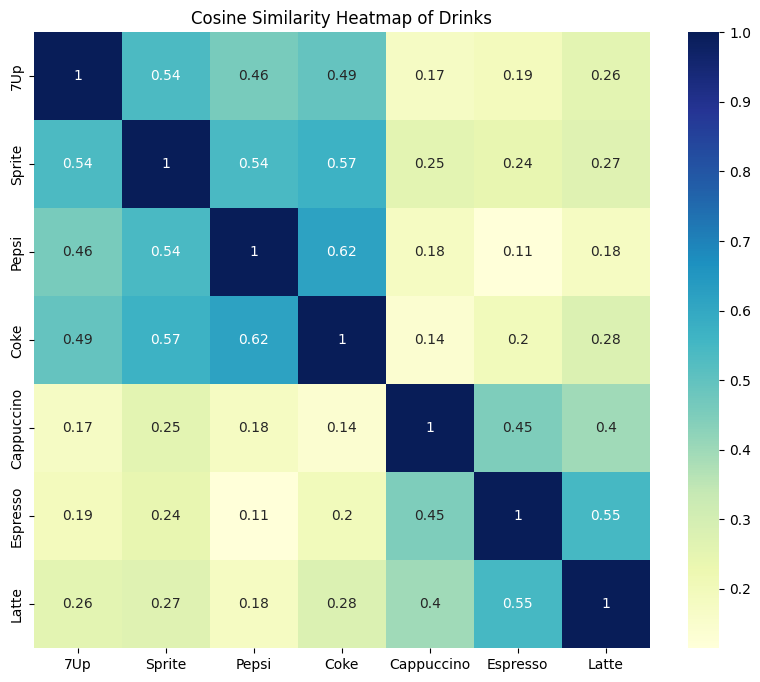

In [126]:

similarity_matrix = cosine_similarity(drink_vectors)


similarity_df = pd.DataFrame(similarity_matrix, index=unique_drinks, columns=unique_drinks)


plt.figure(figsize=(10, 8))
sns.heatmap(similarity_df, annot=True, cmap='YlGnBu', square=True)
plt.title('Cosine Similarity Heatmap of Drinks')
plt.show()

c:\Users\UM\anaconda3\envs\bug\Lib\site-packages\sklearn\utils\validation.py:757: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\UM\anaconda3\envs\bug\Lib\site-packages\sklearn\utils\validation.py:595: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\UM\anaconda3\envs\bug\Lib\site-packages\sklearn\utils\validation.py:604: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\UM\anaconda3\envs\bug\Lib\site-packages\sklearn\utils\validation.py:757: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\UM\anaconda3\envs\bug\Lib\site-packages\sklearn\utils\validation.py:595: FutureWarning:

is_sparse is deprecated and will be remove

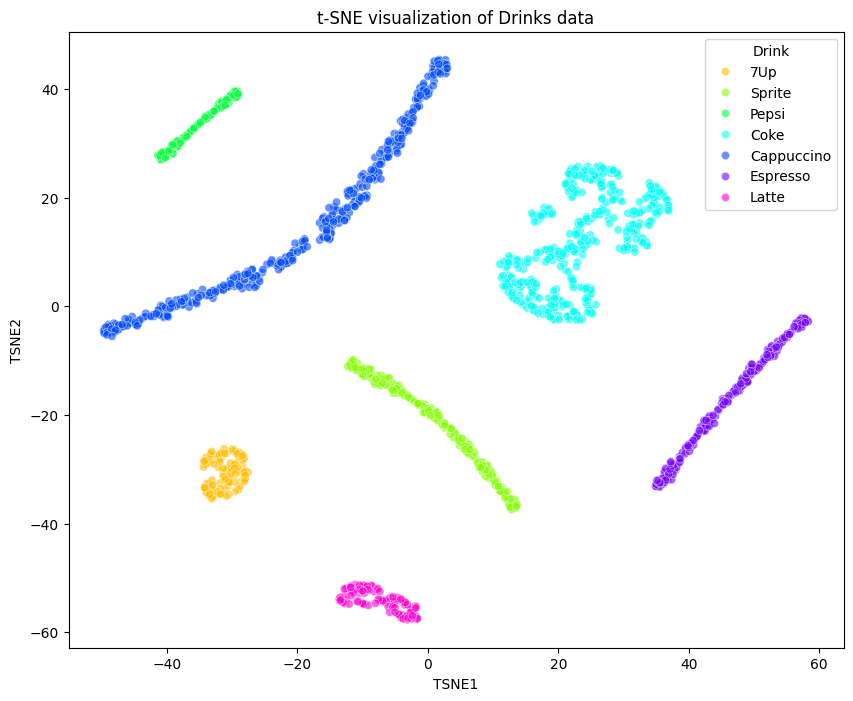

In [127]:

encoder = OneHotEncoder()
encoded_drinks = encoder.fit_transform(df[['Drink']]).toarray()
encoded_drinks_df = pd.DataFrame(encoded_drinks, columns=encoder.get_feature_names_out(['Drink']))
df = pd.concat([df.reset_index(drop=True), encoded_drinks_df.reset_index(drop=True)], axis=1)


scaler = StandardScaler()
numeric_features = ['Rank', 'Amount', 'Quantity']
df[numeric_features] = scaler.fit_transform(df[numeric_features])


tsne_input = df[numeric_features + list(encoded_drinks_df.columns)]


tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(tsne_input)


df_tsne = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])
df_tsne['Drink'] = df['Drink']


plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='TSNE1', y='TSNE2',
    hue='Drink',
    palette=sns.color_palette('hsv', len(df['Drink'].unique())),
    data=df_tsne,
    legend='full',
    alpha=0.6
)
plt.title('t-SNE visualization of Drinks data')
plt.show()

In [128]:


app = Dash(__name__)

app.layout = html.Div([
    dcc.Graph(id='tsne-plot', config={'scrollZoom': True, 'displayModeBar': True}, style={'height': '80vh'}),
    html.Div(id='selected-data', style={'whiteSpace': 'pre-wrap'})
])

@app.callback(
    Output('tsne-plot', 'figure'),
    Input('tsne-plot', 'selectedData')
)
def update_graph(selectedData):
    fig = px.scatter(tsne_df, x='x', y='y', text='Drink', title='t-SNE Visualization of Drink Word Vectors')
    fig.update_traces(marker=dict(size=10))

    if selectedData:
        selected_points = selectedData['points']
        selected_drinks = [point['text'] for point in selected_points]
        selected_df = tsne_df[tsne_df['Drink'].isin(selected_drinks)]
        selected_fig = px.scatter(selected_df, x='x', y='y', text='Drink', title='Selected Drinks')
        selected_fig.update_traces(marker=dict(size=10, color='red'))
        return selected_fig

    return fig

@app.callback(
    Output('selected-data', 'children'),
    Input('tsne-plot', 'selectedData')
)
def display_selected_data(selectedData):
    if selectedData:
        selected_points = selectedData['points']
        selected_drinks = [point['text'] for point in selected_points]
        selected_df = df[df['Drink'].isin(selected_drinks)]
        return selected_df.to_string()
    return "No points selected"

if __name__ == '__main__':
    app.run_server(debug=True)